<a href="https://colab.research.google.com/github/sortegaIUMA/SpectralPythonTest/blob/main/PySpectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spectral

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 5.4 MB/s eta 0:00:00


Import the Spectral Python (SPy) library, the Matplotlib library, and numpy.

Download an example data from the **HistologyHSI-GB** database:



In [ ]:
!wget https://nimbus.iuma.ulpgc.es/s/LHtLLtXQqx3y8Fw/download/20x_C01_1_1_T.zip
!unzip /content/20x_C01_1_1_T.zip

--2023-07-06 17:05:27--  https://nimbus.iuma.ulpgc.es/s/LHtLLtXQqx3y8Fw/download/20x_C01_1_1_T.zip
Resolving nimbus.iuma.ulpgc.es (nimbus.iuma.ulpgc.es)... 193.145.147.66
Connecting to nimbus.iuma.ulpgc.es (nimbus.iuma.ulpgc.es)|193.145.147.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 847195083 (808M) [application/zip]
Saving to: ‘20x_C01_1_1_T.zip’

20x_C01_1_1_T.zip   100%[===================>] 807.95M  10.5MB/s    in 79s     

2023-07-06 17:06:47 (10.2 MB/s) - ‘20x_C01_1_1_T.zip’ saved [847195083/847195083]

Archive:  /content/20x_C01_1_1_T.zip
   creating: 20x_C01_1_1_T/
  inflating: 20x_C01_1_1_T/darkReference  
  inflating: 20x_C01_1_1_T/darkReference.hdr  
  inflating: 20x_C01_1_1_T/raw       
  inflating: 20x_C01_1_1_T/raw.hdr   
  inflating: 20x_C01_1_1_T/rgb.png   
  inflating: 20x_C01_1_1_T/whiteReference  
  inflating: 20x_C01_1_1_T/whiteReference.hdr  


Load the raw image using the Spectral Python (SPy) library:

In [ ]:
import numpy as np
from spectral import *

def read_hyperspectral_cube(file_name):
    """Function used to read an ENVI hyperspectral image, and return a numpy
    data structure containing the 3D hyperspectral cube

    Parameters
    ----------
    file_name : str
        The file location of the ENVI header related to the hyperspectral data.

    Returns
    -------
    hyperspectral_data: ndarray
        3-dimensional numpy array containing the hyperspectral cube
    wavelengths: ndarray
        1-dimensional numpy array containing the spectral bands corresponding to
        the hyperspectral cube
    """

    ENVI_structure = envi.open(file_name)
    hyperspectral_data = ENVI_structure.load()
    wavelengths = ENVI_structure.bands.centers
    return hyperspectral_data, wavelengths

def hyperspectral_calibration(raw_data, white_reference, dark_reference):
    """Perform the calibration of a hyperspectral imaging using a white and
    dark reference images.

    Parameters
    ----------
    raw_data : ndarray
        Array containing the raw hyperspectral cube
    white_reference : ndarray
        Array containing the white reference
    dark_reference : ndarray
        Array containing the dark reference
    Returns
    -------
    ndarray
        Calibrated hyperspectral cube
    """
    return (raw_data-dark_reference)/(white_reference-dark_reference)

def band_reduction(input_data, wavelengths):
    """Perform the band reduction to the hyperspectral cube

    Parameters
    ----------
    input_data : 3D ndarray
        Array containing the raw hyperspectral cube
    wavelengths : numpy array containing the spectral bands corresponding to
    the hyperspectral cube
    Returns
    -------
    band_reduced_cube: ndarray
        3-dimensional numpy array containing the hyperspectral cube
    wavelength_reduced: ndarray
        1-dimensional numpy array containing the spectral bands corresponding to
        the hyperspectral cube
    """
    band_reduced_cube = (calibrated_image[:,:,0:-1:3] + calibrated_image[:,:,1:-1:3] + calibrated_image[:,:,2:-1:3])/3
    wavelength_reduced = wavelenghts[1:-1:3]
    return band_reduced_cube, wavelength_reduced






In [ ]:
# Define the file names for the raw image, the white reference and the dark
# reference.
rawFileName = '/content/20x_C01_1_1_T/raw.hdr'
white_reference_file_name = '/content/20x_C01_1_1_T/whiteReference.hdr'
dark_reference_file_name = '/content/20x_C01_1_1_T/darkReference.hdr'

# Use the function read_hyperspectral_cube to load the ENVI files into numpy
# arrays.
raw, wavelenghts = read_hyperspectral_cube(rawFileName)
white_reference,_ = read_hyperspectral_cube(white_reference_file_name)
dark_reference,_ = read_hyperspectral_cube(dark_reference_file_name)

# Perform the hyperspectral image calibration
calibrated_image = hyperspectral_calibration(raw, white_reference, dark_reference)

# TODO: Optional. Perform the band reduction.

401.21

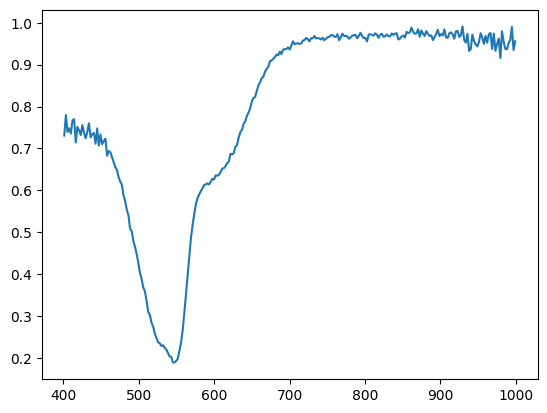

In [ ]:
band_reduced = (calibrated_image[:,:,0:-1:3] + calibrated_image[:,:,1:-1:3] + calibrated_image[:,:,2:-1:3])/3
wavelength_reduced = wavelenghts[1:-1:3]
plt.plot(wavelength_reduced,band_reduced[500,600,:])
wavelength_reduced[0]

Represent a single band from the raw data:

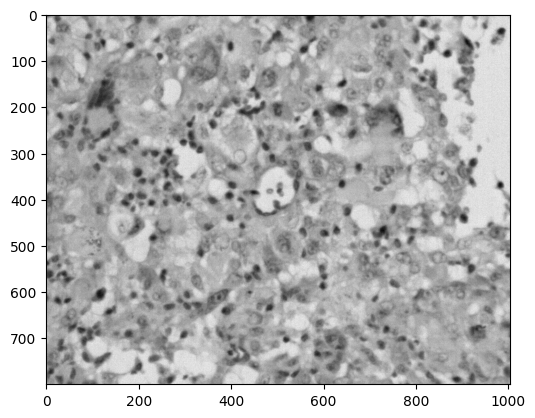

In [ ]:
import matplotlib.pyplot as plt
raw_band50 = raw[:,:,50]
calibrated_band50 = calibrated_image[:,:,50]
raw_rgb = raw[:,:,[50,200,500]]

# fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
# g = plt.imshow(raw_band50,ax=axes[0])
# g.set(title="Raw image" + str(wavelengths[50]))
g = plt.imshow(calibrated_band50,cmap='gray')
# g.set(title="ML")

Represent the spectra from a pixel of the image:

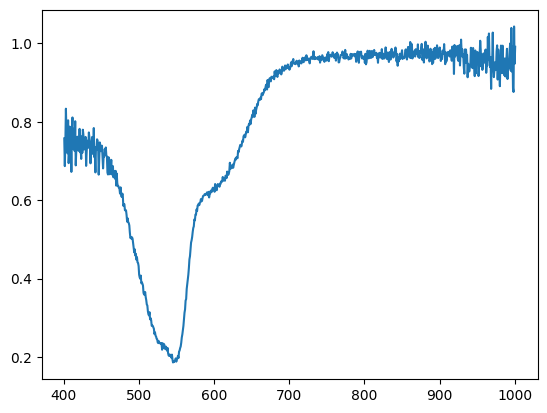

In [ ]:
singleSpectra = np.squeeze(raw[500,600,:])
singleSpectra = np.squeeze(calibrated_image[500,600,:])

plt.plot(wavelenghts,singleSpectra)